
# How Does Electric Vehicles' Driving Range Vary By Type and Brand of Electric Vehicle?
- **Author**: Clifford Okwudili Aniakor
- **Date**:  13th February, 2024



## Introduction
 The data was pulled from the [Washington State Department of Licensing](https://data.wa.gov/Transportation/Electric-Vehicle-Population-Data/f6w7-q2d2/about_data) last updated on 16th January, 2024. The columns include:

- **VIN (1-10)**: The 1st 10 characters of each vehicle's Vehicle Identification Number (VIN)
- **County**: This is the geographic region of a state that a vehicle's owner is listed to reside within. Vehicles registered in Washington state may be located in other states.
- **City**: The city in which the registered owner resides.
- **State**: This is the geographic region of the country associated with the record. These addresses may be located in other states.
- **Postal Code**: The 5 digit zip code in which the registered owner resides.
- **Model Year**: The model year of the vehicle, determined by decoding the Vehicle Identification Number (VIN).
- **Make**: The manufacturer of the vehicle, determined by decoding the Vehicle Identification Number (VIN).
- **Model**: The model of the vehicle, determined by decoding the Vehicle Identification Number (VIN).
- **Electric Vehicle Type**: This distinguishes the vehicle as all electric or a plug-in hybrid.
- **Clean Alternative Fuel Vehicle (CAFV) Eligibility**: This categorizes vehicle as Clean Alternative Fuel Vehicles (CAFVs) based on the fuel requirement and electric-only range requirement in House Bill 2042 as passed in the 2019 legislative session.
- **Electric Range**: Describes how far a vehicle can travel purely on its electric charge.
- **Base MSRP**: This is the lowest Manufacturer's Suggested Retail Price (MSRP) for any trim level of the model in question.
- **Legislative District**: The specific section of Washington State that the vehicle's owner resides in, as represented in the state legislature.
- **DOL Vehicle ID**: Unique number assigned to each vehicle by Department of Licensing for identification purposes.
- **Vehicle Location**: The center of the ZIP Code for the registered vehicle.
- **Electric Utility**: This is the electric power retail service territories serving the address of the registered vehicle.
- **2020 Census Tract**: The census tract identifier is a combination of the state, county, and census tract codes as assigned by the United States Census Bureau in the 2020 census, also known as Geographic Identifier (GEOID). 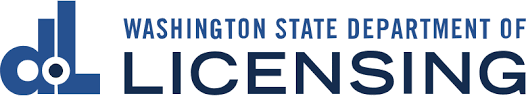



In [264]:
! pip install chart-studio
! pip install --upgrade plotly
! pip install -U kaleido

In [265]:
import pandas as pd
import numpy as np
import kaleido
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import plot, iplot
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default ="colab"

## Visual and Programmatic Assessment with Minute Cleaning

In [266]:
evs=pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")
evs.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [267]:
evs.shape

(166800, 17)

In [268]:
evs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         166800 non-null  object 
 1   County                                             166795 non-null  object 
 2   City                                               166795 non-null  object 
 3   State                                              166800 non-null  object 
 4   Postal Code                                        166795 non-null  float64
 5   Model Year                                         166800 non-null  int64  
 6   Make                                               166800 non-null  object 
 7   Model                                              166800 non-null  object 
 8   Electric Vehicle Type                              166800 non-null  object

In [269]:
evs.columns=evs.columns.str.lower().str.replace(" ","_")
evs.columns

Index(['vin_(1-10)', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'legislative_district', 'dol_vehicle_id',
       'vehicle_location', 'electric_utility', '2020_census_tract'],
      dtype='object')

In [270]:
evs.dropna(inplace=True)

In [271]:
evs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166435 entries, 0 to 166799
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   vin_(1-10)                                         166435 non-null  object 
 1   county                                             166435 non-null  object 
 2   city                                               166435 non-null  object 
 3   state                                              166435 non-null  object 
 4   postal_code                                        166435 non-null  float64
 5   model_year                                         166435 non-null  int64  
 6   make                                               166435 non-null  object 
 7   model                                              166435 non-null  object 
 8   electric_vehicle_type                              166435 non-null  object

In [272]:
evs["electric_vehicle_type"].value_counts()

Battery Electric Vehicle (BEV)            130053
Plug-in Hybrid Electric Vehicle (PHEV)     36382
Name: electric_vehicle_type, dtype: int64

In [273]:
evs["clean_alternative_fuel_vehicle_(cafv)_eligibility"].value_counts()

Eligibility unknown as battery range has not been researched    83377
Clean Alternative Fuel Vehicle Eligible                         64142
Not eligible due to low battery range                           18916
Name: clean_alternative_fuel_vehicle_(cafv)_eligibility, dtype: int64

In [274]:
evs.make.value_counts()

TESLA                   74661
NISSAN                  13835
CHEVROLET               13046
FORD                     8557
BMW                      7181
KIA                      6984
TOYOTA                   5780
VOLKSWAGEN               4706
JEEP                     4090
HYUNDAI                  4049
VOLVO                    3954
RIVIAN                   3550
AUDI                     3456
CHRYSLER                 2865
MERCEDES-BENZ            1341
PORSCHE                  1096
MITSUBISHI                940
MINI                      854
POLESTAR                  852
HONDA                     819
FIAT                      801
SUBARU                    787
MAZDA                     384
LEXUS                     307
SMART                     275
LINCOLN                   253
CADILLAC                  243
LUCID                     231
JAGUAR                    221
GENESIS                   160
LAND ROVER                 52
ALFA ROMEO                 29
DODGE                      28
FISKER    

## How Does the Electric Range of Electric Vehicles Differ by their Manufacturers and Can This Discrepancy by Classified?


In [275]:
evs.electric_range.describe()

count    166435.000000
mean         61.496861
std          93.270217
min           0.000000
25%           0.000000
50%           0.000000
75%          84.000000
max         337.000000
Name: electric_range, dtype: float64

The Washington's Department of Licensing (DoL) stated that zero is entered when the electric range of the vehicle has not been researched. When these zeros are excessive, they can impact both the median and mean. Thus, vehicles with an electric range of zero have to be excluded.

In [276]:
evs[evs.electric_range!=0].electric_range.describe()

count    83058.000000
mean       123.229912
std         99.119792
min          6.000000
25%         32.000000
50%         84.000000
75%        215.000000
max        337.000000
Name: electric_range, dtype: float64

In [277]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [278]:
evs.make.unique()

array(['FIAT', 'TESLA', 'BMW', 'RIVIAN', 'CHRYSLER', 'CHEVROLET', 'KIA',
       'FORD', 'TOYOTA', 'NISSAN', 'MITSUBISHI', 'HONDA', 'AUDI', 'JEEP',
       'VOLVO', 'HYUNDAI', 'VOLKSWAGEN', 'SUBARU', 'LUCID', 'MINI',
       'POLESTAR', 'SMART', 'LINCOLN', 'MERCEDES-BENZ', 'LEXUS',
       'PORSCHE', 'ALFA ROMEO', 'DODGE', 'JAGUAR', 'CADILLAC',
       'LAND ROVER', 'MAZDA', 'GENESIS', 'FISKER', 'GMC', 'TH!NK',
       'WHEEGO ELECTRIC CARS', 'AZURE DYNAMICS', 'BENTLEY'], dtype=object)

In [279]:
brands=['FIAT', 'TESLA', 'BMW', 'RIVIAN', 'CHRYSLER', 'CHEVROLET', 'KIA',
       'FORD', 'TOYOTA', 'NISSAN', 'MITSUBISHI', 'HONDA', 'AUDI', 'JEEP',
       'VOLVO', 'HYUNDAI', 'VOLKSWAGEN', 'SUBARU', 'LUCID', 'MINI',
       'POLESTAR', 'SMART', 'LINCOLN', 'MERCEDES-BENZ', 'LEXUS',
       'PORSCHE', 'ALFA ROMEO', 'DODGE', 'JAGUAR', 'CADILLAC',
       'LAND ROVER', 'MAZDA', 'GENESIS', 'FISKER', 'GMC', 'TH!NK',
       'WHEEGO ELECTRIC CARS', 'AZURE DYNAMICS', 'BENTLEY']

compile = []

#evaluate the mean, median, max and count for each brand and append the result to list
for brand in brands:
  average_range=evs[(evs.electric_range!=0) & (evs.make==brand)].electric_range.mean()
  median_range=evs[(evs.electric_range!=0) & (evs.make==brand)].electric_range.median()
  maximum_range=evs[(evs.electric_range!=0) & (evs.make==brand)].electric_range.max()
  brand_count=evs[(evs.electric_range!=0) & (evs.make==brand)].electric_range.count()

  compile.append({'brand': brand, 'average_range': average_range,
                       'median_range': median_range, 'maximum_range': maximum_range, 'brand_count': brand_count})

compilation = pd.DataFrame(compile)

# sort the brands according to their average ranges in descending order
compilation.sort_values('average_range', ascending=False)

,brand,average_range,median_range,maximum_range,brand_count
1,TESLA,240.652833,220.0,337.0,25181
28,JAGUAR,234.000000,234.0,234.0,192
20,POLESTAR,233.000000,233.0,233.0,141
5,CHEVROLET,135.323183,53.0,259.0,9162
16,VOLKSWAGEN,107.421348,125.0,125.0,1068
9,NISSAN,104.303070,84.0,215.0,10816
36,WHEEGO ELECTRIC CARS,100.000000,100.0,100.0,3
35,TH!NK,100.000000,100.0,100.0,5
15,HYUNDAI,96.567130,33.0,258.0,864
6,KIA,88.170003,34.0,239.0,3747


In [280]:
for i, (average, median) in enumerate(zip(compilation['average_range'], compilation['median_range'])):
    if average >= 123.229912 and median >= 84:
        compilation.at[i, 'range_class'] = 'High Mean & High Median Ranges'
    elif average >= 123.229912 and median < 84:
        compilation.at[i, 'range_class'] = 'High Mean & Low Median Ranges'
    elif average < 123.229912 and median >= 84:
        compilation.at[i, 'range_class'] = 'Low Mean & High Median Ranges'
    elif average < 123.229912 and median < 84:
        compilation.at[i, 'range_class'] = 'Low Mean & Low Median Ranges'

compilation

,brand,average_range,median_range,maximum_range,brand_count,range_class
0,FIAT,85.625468,87.0,87.0,801,Low Mean & High Median Ranges
1,TESLA,240.652833,220.0,337.0,25181,High Mean & High Median Ranges
2,BMW,46.984957,30.0,153.0,5451,Low Mean & Low Median Ranges
3,RIVIAN,NaN,NaN,NaN,0,NaN
4,CHRYSLER,32.218848,32.0,33.0,2865,Low Mean & Low Median Ranges
5,CHEVROLET,135.323183,53.0,259.0,9162,High Mean & Low Median Ranges
6,KIA,88.170003,34.0,239.0,3747,Low Mean & Low Median Ranges
7,FORD,25.276749,19.0,100.0,3888,Low Mean & Low Median Ranges
8,TOYOTA,28.654719,25.0,103.0,5552,Low Mean & Low Median Ranges
9,NISSAN,104.303070,84.0,215.0,10816,Low Mean & High Median Ranges


In [281]:
compilation.sort_values('median_range', ascending=False)

,brand,average_range,median_range,maximum_range,brand_count,range_class
28,JAGUAR,234.000000,234.0,234.0,192,High Mean & High Median Ranges
20,POLESTAR,233.000000,233.0,233.0,141,High Mean & High Median Ranges
1,TESLA,240.652833,220.0,337.0,25181,High Mean & High Median Ranges
16,VOLKSWAGEN,107.421348,125.0,125.0,1068,Low Mean & High Median Ranges
35,TH!NK,100.000000,100.0,100.0,5,Low Mean & High Median Ranges
36,WHEEGO ELECTRIC CARS,100.000000,100.0,100.0,3,Low Mean & High Median Ranges
0,FIAT,85.625468,87.0,87.0,801,Low Mean & High Median Ranges
9,NISSAN,104.303070,84.0,215.0,10816,Low Mean & High Median Ranges
21,SMART,62.356364,58.0,68.0,275,Low Mean & Low Median Ranges
37,AZURE DYNAMICS,56.000000,56.0,56.0,8,Low Mean & Low Median Ranges


In [282]:
compilation.dropna(inplace=True)
compilation

,brand,average_range,median_range,maximum_range,brand_count,range_class
0,FIAT,85.625468,87.0,87.0,801,Low Mean & High Median Ranges
1,TESLA,240.652833,220.0,337.0,25181,High Mean & High Median Ranges
2,BMW,46.984957,30.0,153.0,5451,Low Mean & Low Median Ranges
4,CHRYSLER,32.218848,32.0,33.0,2865,Low Mean & Low Median Ranges
5,CHEVROLET,135.323183,53.0,259.0,9162,High Mean & Low Median Ranges
6,KIA,88.170003,34.0,239.0,3747,Low Mean & Low Median Ranges
7,FORD,25.276749,19.0,100.0,3888,Low Mean & Low Median Ranges
8,TOYOTA,28.654719,25.0,103.0,5552,Low Mean & Low Median Ranges
9,NISSAN,104.303070,84.0,215.0,10816,Low Mean & High Median Ranges
10,MITSUBISHI,30.488298,24.0,62.0,940,Low Mean & Low Median Ranges


Visualize result

In [283]:
my_colors = [
    "#FF5733", "#C70039", "#900C3F", "#581845", "#FF8C00",
    "#FFD700", "#4CAF50", "#00BCD4", "#FF1493", "#8A2BE2",
    "#006400", "#7B68EE", "#00CED1", "#4682B4", "#6495ED",
    "#00FFFF", "#7FFFD4", "#32CD32", "#20B2AA", "#2E8B57",
    "#008080", "#1E90FF", "#4169E1", "#00BFFF", "#000080",
    "#FF6347", "#FF0000", "#00FF00", "#0000FF", "#FFFF00",
    "#00FFFF", "#FF00FF", "#C0C0C0", "#808080", "#800000",
    "#808000", "#008000", "#800080", "#008080", "#0000FF"
]

In [284]:

#Define the horizontal and vertical lines for the mean and median range
horizontal_line = go.layout.Shape(
    type="line",
    x0=compilation['median_range'].min(),
    y0=123.229912,
    x1=compilation['median_range'].max(),
    y1=123.229912,
    line=dict(
        color="black",
        width=2,
        dash="dashdot"
    )
)

vertical_line = go.layout.Shape(
    type="line",
    x0=84.0,
    y0=compilation['average_range'].min(),
    x1=84.0,
    y1=compilation['average_range'].max(),
    line=dict(
        color="black",
        width=2,
        dash="dashdot"
    )
)

# the scatter plot
fig = px.scatter(compilation,
                 x='median_range',
                 y='average_range',
                 color='brand',
                 size='brand_count',
                 size_max=100,
                 color_discrete_sequence=my_colors2,
                 width=1000,
                 height=1000,
                 title='<b>How Electric Vehicles Brands Differ by their Average and Median Ranges',
                 labels={
                     'brand': 'Electric Vehicles Brands',
                     'average_range': 'Average Electric Vehicle Range (in Miles)',
                     'median_range': 'Median Electric Vehicle Range (in Miles)',
                     'brand_count': 'Number of Electric Vehicles'
                 })

# Add the horizontal and vertical lines to the plot
fig.add_shape(horizontal_line)
fig.add_shape(vertical_line)

# state the annotations for the quadrants
annotations = [
    dict(
        x=184.0,
        y=223.229912,
        xref="x",
        yref="y",
        text="High Mean & High Median Ranges",
        showarrow=False,
        font=dict(
            size=10,
            color="black"
        ),
        align="left",
        xshift=10,
        yshift=10
    ),
      dict(
        x=45.0,
        y=223.229912,
        xref="x",
        yref="y",
        text="High Mean & Low Median Ranges",
        showarrow=False,
        font=dict(
            size=10,
            color="black"
        ),
        align="left",
        xshift=10,
        yshift=-10
    ),
    dict(
        x=184.0,
        y=75,
        xref="x",
        yref="y",
        text="Low Mean & High Median Ranges",
        showarrow=False,
        font=dict(
            size=10,
            color="black"
        ),
        align="right",
        xshift=-10,
        yshift=10
    ),
    dict(
        x=45.0,
        y=75,
        xref="x",
        yref="y",
        text="Low Mean & Low Median Ranges",
        showarrow=False,
        font=dict(
            size=10,
            color="black"
        ),
        align="right",
        xshift=-10,
        yshift=-10
    ),

]

# Add the annotations to the scatter plot
for annotation in annotations:
    fig.add_annotation(annotation)


# render the scatter plot
fig.show()


From the chart, it is apparent that electric vehicles ranges vary by the manufacturer irrespective of the metric being used (median or mean). Notably, only 3 manufacturers could be said to have high median and high average electric range: Tesla, Jaguar and Polestar. 74% of brands (that is 26) had low median and mean electric ranges. The non-zero counts of the respective brands could have also played a factor but that's unlikely in this case. Chevrolet is the only brand with a high mean and low median electric range.

In [285]:
#Define the horizontal and vertical lines for the mean and median range
horizontal_line = go.layout.Shape(
    type="line",
    x0=compilation['median_range'].min(),
    y0=123.229912,
    x1=compilation['median_range'].max(),
    y1=123.229912,
    line=dict(
        color="black",
        width=2,
        dash="dashdot"
    )
)

vertical_line = go.layout.Shape(
    type="line",
    x0=84.0,
    y0=compilation['average_range'].min(),
    x1=84.0,
    y1=compilation['average_range'].max(),
    line=dict(
        color="black",
        width=2,
        dash="dashdot"
    )
)

# the scatter plot on a logarithmic scale
fig = px.scatter(compilation,
                 x='median_range',
                 y='average_range',
                 color='brand',
                 size='brand_count',
                 color_discrete_sequence=my_colors,
                 size_max=100,
                 log_x=True,
                 log_y=True,
                 width=1000,
                 height=1000,
                 title='<b>How Electric Vehicles Brands Differ by their Average and Median Ranges',
                 labels={
                     'brand': 'Electric Vehicles Brands',
                     'average_range': 'Average Electric Vehicle Range (in Miles)',
                     'median_range': 'Median Electric Vehicle Range (in Miles)',
                     'brand_count': 'Number of Electric Vehicles',
                     'normalized_size': 'Normalized Size'
                 })
# Add the horizontal and vertical lines to the plot
fig.add_shape(horizontal_line)
fig.add_shape(vertical_line)

# state the annotations for the quadrants
annotations = [
    dict(
        x=np.log10(184.0),
        y=np.log10(223.229912),
        xref="x",
        yref="y",
        text="High Mean & High Median Ranges",
        showarrow=False,
        font=dict(
            size=10,
            color="black"
        ),
        align="left",
        xshift=10,
        yshift=10
    ),
      dict(
        x=np.log10(45.0),
        y=np.log10(223.229912),
        xref="x",
        yref="y",
        text="High Mean & Low Median Ranges",
        showarrow=False,
        font=dict(
            size=10,
            color="black"
        ),
        align="left",
        xshift=10,
        yshift=-10
    ),
    dict(
        x=np.log10(184.0),
        y=np.log10(75),
        xref="x",
        yref="y",
        text="Low Mean & High Median Ranges",
        showarrow=False,
        font=dict(
            size=10,
            color="black"
        ),
        align="right",
        xshift=-10,
        yshift=10
    ),
    dict(
        x=np.log10(45.0),
        y=np.log10(75),
        xref="x",
        yref="y",
        text="Low Mean & Low Median Ranges",
        showarrow=False,
        font=dict(
            size=10,
            color="black"
        ),
        align="right",
        xshift=-10,
        yshift=-10
    ),

]

# Add the annotations to the scatter plot
for annotation in annotations:
    fig.add_annotation(annotation)

#adjust the tick labels based on your actual data range and values instead of the log scale
x_tick_labels = [10, 20, 50, 100, 200, 500, 1000]
y_tick_labels = [10, 20, 50, 100, 200, 500, 1000]

# Include layout properties for the scatter plot
fig.update_layout(
    xaxis=dict(
        tickvals=[10, 20, 50, 100, 200, 500, 1000],  # Set the positions of the tick marks
        ticktext=x_tick_labels  # Set the text for the tick labels
    ),
    yaxis=dict(
        tickvals=[10, 20, 50, 100, 200, 500, 1000],  # Set the positions of the tick marks
        ticktext=y_tick_labels  # Set the text for the tick labels
    )
)

# Show the plot
fig.show()

A logarithmic scale was used here to minimize the spread of the electric vehicle range.

## Do All Electric Vehicles with Low Electric Ranges Ineligible for Clean Alternative Fuel Vehicle Certification?


In [286]:
evs[evs.electric_range!=0].electric_range.describe()

count    83058.000000
mean       123.229912
std         99.119792
min          6.000000
25%         32.000000
50%         84.000000
75%        215.000000
max        337.000000
Name: electric_range, dtype: float64

In [287]:
evs[evs.electric_range!=0].electric_range.median()

84.0

In [288]:
low_electric_range=evs.query("electric_range!=0 and electric_range<84")
high_electric_range=evs.query("electric_range>=84")

num_cars=evs[evs.electric_range!=0].shape[0]
num_cars==low_electric_range["electric_range"].count()+high_electric_range["electric_range"].count()

True

In [289]:
low_electric_range["clean_alternative_fuel_vehicle_(cafv)_eligibility"].value_counts()

Clean Alternative Fuel Vehicle Eligible    21638
Not eligible due to low battery range      18916
Name: clean_alternative_fuel_vehicle_(cafv)_eligibility, dtype: int64

In [290]:
high_electric_range["clean_alternative_fuel_vehicle_(cafv)_eligibility"].value_counts()

Clean Alternative Fuel Vehicle Eligible    42504
Name: clean_alternative_fuel_vehicle_(cafv)_eligibility, dtype: int64

No. From the dataset, not all electric vehicles with "low" electric ranges are ineligible for clean alternative fuel vehicle certifications. 21638 vehicles with low electric ranges were still given clean alternative fuel vehicle certification.

##How Does Electric Range Vary by Electric Vehicle Type? Are All Electric Vehicles With High Electric Range All BEVs? Is It Irrespective of the Manufacturer?

In [291]:
low_electric_range["electric_vehicle_type"].value_counts()

Plug-in Hybrid Electric Vehicle (PHEV)    35784
Battery Electric Vehicle (BEV)             4770
Name: electric_vehicle_type, dtype: int64

In [292]:
high_electric_range["electric_vehicle_type"].value_counts()

Battery Electric Vehicle (BEV)            41906
Plug-in Hybrid Electric Vehicle (PHEV)      598
Name: electric_vehicle_type, dtype: int64

In [293]:
first=evs[evs.electric_range!=0].groupby(['electric_vehicle_type','make'])["electric_range"].mean().reset_index()
second=evs[evs.electric_range!=0].groupby(['electric_vehicle_type','make'])["electric_range"].median().reset_index()
combo = pd.merge(first, second, on=['electric_vehicle_type', 'make'], suffixes=('_mean', '_median'))
combo2=pd.pivot_table(combo, index = 'make', columns = 'electric_vehicle_type', values = ['electric_range_mean','electric_range_median'] ).reset_index()
combo2.columns=['make','mean_BEV_range','mean_hybrid_range','median_BEV_range','median_hybrid_range']
combo2

,make,mean_BEV_range,mean_hybrid_range,median_BEV_range,median_hybrid_range
0,ALFA ROMEO,NaN,33.000000,NaN,33.0
1,AUDI,209.059621,18.594946,204.0,18.0
2,AZURE DYNAMICS,56.000000,NaN,56.0,NaN
3,BENTLEY,NaN,19.666667,NaN,21.0
4,BMW,99.817204,40.959943,81.0,30.0
5,CADILLAC,NaN,36.622222,NaN,37.0
6,CHEVROLET,234.788833,45.328482,238.0,53.0
7,CHRYSLER,NaN,32.218848,NaN,32.0
8,DODGE,NaN,32.000000,NaN,32.0
9,FIAT,85.625468,NaN,87.0,NaN


In [294]:
combo3=combo2.copy()
combo3.dropna(inplace=True)
combo3

,make,mean_BEV_range,mean_hybrid_range,median_BEV_range,median_hybrid_range
1,AUDI,209.059621,18.594946,204.0,18.0
4,BMW,99.817204,40.959943,81.0,30.0
6,CHEVROLET,234.788833,45.328482,238.0,53.0
11,FORD,78.024390,21.713893,76.0,19.0
13,HYUNDAI,227.475862,30.428571,258.0,30.0
16,KIA,178.604938,30.566623,239.0,32.0
21,MERCEDES-BENZ,87.000000,11.362264,87.0,10.0
22,MINI,110.000000,13.467890,110.0,12.0
23,MITSUBISHI,61.952381,28.228050,62.0,22.0
26,PORSCHE,198.488479,14.594262,203.0,14.0


In [295]:
# maximum value for x-axis range
max_x = max(combo3["mean_BEV_range"].max(), combo3["mean_hybrid_range"].max())

# Create subplots without shared y-axes
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=False,
                    shared_yaxes=True, horizontal_spacing=0, subplot_titles=['Mean BEV Electric Range (in Miles)', 'Mean Plug-in Hybrid Electric Range (in Miles)'])

# Add bar plots
fig.append_trace(go.Bar(name='Mean BEV Electric Range',
                     y=combo3['make'],
                     x=combo3["mean_BEV_range"],
                     orientation='h',
                     width=0.4,
                     showlegend=False,
                     marker_color='#e377c2',
                     text=combo3["mean_BEV_range"].round(2)),
              row=1, col=1)
fig.append_trace(go.Bar(name='Mean Plug-in Hybrid Electric Range',
                     y=combo3['make'],
                     x=combo3['mean_hybrid_range'],
                     orientation='h',
                     width=0.4,
                     showlegend=False,
                     marker_color='#d62728',
                     text=combo3["mean_hybrid_range"].round(2)),
              row=1, col=2)

# Specify the hover template
fig.update_traces(
    hovertemplate="<br>".join([
        "<b>%{y}</b>",
        "Mean Electric Vehicle Range: %{x}"
    ]))
fig.update_traces(textposition='outside')

# Update the layout
fig.update_layout(
    title="<b>Comparison of Average Electric Ranges for BEVs and PHEVs</b>",
    height=800,
    width=970
)

# similar x-axes range for both bars
fig.update_xaxes(range=[0, max_x], row=1, col=1)
fig.update_xaxes(range=[0, max_x], row=1, col=2)
#reverse the order of the BEV bars
fig['layout']['xaxis1']['autorange'] = "reversed"

fig.show()


Irrespective of the brand, battery electric vehicles still had better mean average ranges when compared to hybrid electric vehicles.

In [296]:
# maximum value for x-axis range
max_x = max(combo3["median_BEV_range"].max(), combo3["median_hybrid_range"].max())

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=False,
                    shared_yaxes=True, horizontal_spacing=0, subplot_titles=['Median BEV Electric Range (in Miles)', 'Median Plug-in Hybrid Electric Range (in Miles)'])

# Include the bars
fig.append_trace(go.Bar(name='Median BEV Electric Range',
                     y=combo3['make'],
                     x=combo3["median_BEV_range"],
                     orientation='h',
                     width=0.4,
                     showlegend=False,
                     marker_color='#80bff3',
                     text=combo3["median_BEV_range"].round(2)),
              row=1, col=1)
fig.append_trace(go.Bar(name='Median Plug-in Hybrid Electric Range',
                     y=combo3['make'],
                     x=combo3['median_hybrid_range'],
                     orientation='h',
                     width=0.4,
                     showlegend=False,
                     marker_color='#0e668b',
                     text=combo3["median_hybrid_range"].round(2)),
              row=1, col=2)

# Specify the hover template
fig.update_traces(
    hovertemplate="<br>".join([
        "<b>%{y}</b>",
        "Mean Electric Vehicle Range: %{x}"
    ]))
fig.update_traces(textposition='outside')

# Update the layout
fig.update_layout(
    title="<b>Comparison of Median Electric Ranges for BEVs and PHEVs</b>",
    height=800,
    width=970
)

# Similar x-axis range for both bars
fig.update_xaxes(range=[0, max_x], row=1, col=1)
fig.update_xaxes(range=[0, max_x], row=1, col=2)
#reverse the order of the BEV bars
fig['layout']['xaxis1']['autorange'] = "reversed"

fig.show()


Irrespective of the brand, battery electric vehicles still had better median average ranges when compared to hybrid electric vehicles.

## Conclusion
- Electric vehicles ranges vary by the manufacturer irrespective of the metric being used (median or mean).
- Only 3 manufacturers could be said to have high median and high average electric range: Tesla, Jaguar and Polestar.
- 74% of brands have low median and mean electric ranges.  - - Chevrolet is the only brand with a high mean and low median electric range.
- 21638 vehicles with low electric ranges were still given clean alternative fuel vehicle certifications.
- Irrespective of the brand and range metric used, battery electric vehicles had higher electric ranges than hybrid electric vehicles.

In [298]:
!jupyter nbconvert --to html EV_Washington3.ipynb

[NbConvertApp] Converting notebook EV_Washington3.ipynb to html
[NbConvertApp] Writing 1402181 bytes to EV_Washington3.html
